## Create a heatmap for the frist 50 documents

Get the first 50 documents. 

In [ ]:
from gensim import corpora, models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
corp = corpora.MmCorpus('data/model/newsgroups.mm')
lda = models.ldamodel.LdaModel.load('data/model/newsgroups_50.model')

Get the topic document distribution

In [ ]:
topic_doc_dist = [lda[doc] for doc in corp[1000:1050]]

Create a dataframe containing the topic document distribution. Therefore create a list with 50 zero entries and change the values for the corresponding topic

In [ ]:
topic_doc_dist_trans = []
for doc in topic_doc_dist:
    doc_list = [i-i for i in range(50)]
    for topic, share in doc:
        doc_list[topic]= share
    topic_doc_dist_trans.append(doc_list)

In [ ]:
pd.DataFrame(topic_doc_dist_trans)

In [ ]:
df = pd.DataFrame(topic_doc_dist_trans, index=["Document " +str(i+1) for i in range(50)],columns=["Topic " +str(i+1) for i in range(50)])

In [ ]:
sns.set(style="white", palette="bright",color_codes=True)

Draw the heatmap

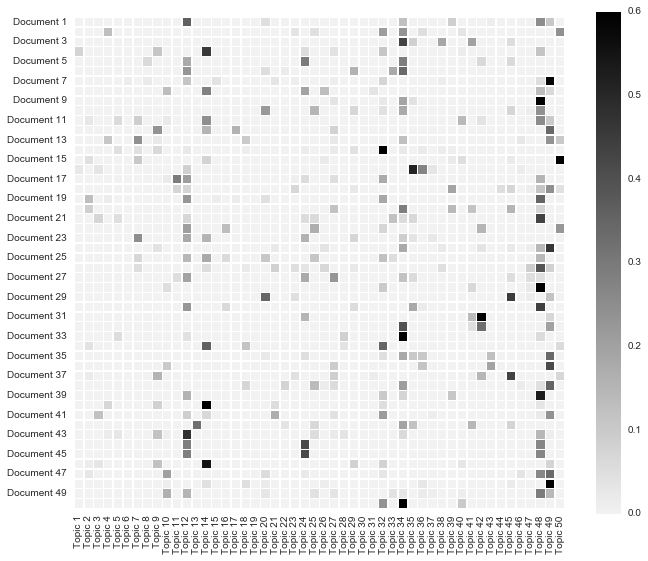

In [54]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
#cmap = sns.diverging_palette(220,10,n=6,as_cmap=True)
cmap = sns.light_palette("black", 1, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df,cmap=cmap,vmin=0, vmax=.6, square=True, ax=ax, yticklabels=2, linewidths = 0.5)